In [2]:
import json
from collections import defaultdict
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from cartopy.io.shapereader import natural_earth
# import xesmf as xe
import cfgrib


import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as mcolors

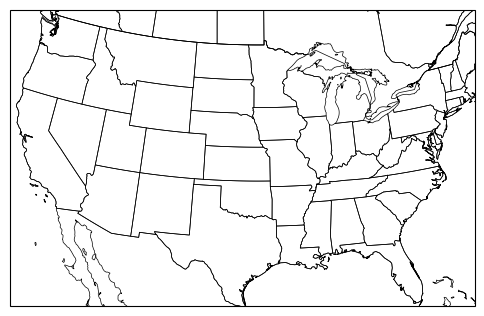

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6, 4),
                       gridspec_kw={'wspace': 0.1, 'hspace': 0.1},
                       subplot_kw={'projection': ccrs.LambertConformal()})

extent = [-120, -75, 26, 50]
crs = ccrs.LambertConformal(central_longitude=-97.5, standard_parallels=(38.5, 38.5))
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

In [4]:
path_2_mping_json='/glade/campaign/cisl/aiml/ai2es/winter_ptypes/mping_hourly/mping_raw2022-04-18_21:00:00.json'

In [5]:
with open(path_2_mping_json) as f:
    json_data = json.load(f)

In [6]:
def classify_precip(description):
    desc = description.lower()
    if "freezing drizzle" in desc or "freezing rain" in desc:
        return "Freezing Rain"
    elif "drizzle" in desc or "rain" in desc:
        return "Rain"
    elif "snow" in desc or "graupel" in desc:
        return "Snow"
    elif "sleet" in desc or "ice pellets" in desc:
        return "ice pellets"
    else:
        return "Other"

In [7]:
 
# Custom purple colormap
def mping_class(ax,json_data,extent):
    custom_colors = ['#f8f4f8', '#f005fc']
    purples = mcolors.LinearSegmentedColormap.from_list("custom", custom_colors)
    
    # Classification function
    def classify_precip(description):
        desc = description.lower()
        if "freezing drizzle" in desc or "freezing rain" in desc:
            return "Freezing Rain"
        elif "drizzle" in desc or "rain" in desc:
            return "Rain"
        elif "snow" in desc or "graupel" in desc:
            return "Snow"
        elif "sleet" in desc or "ice pellets" in desc:
            return "Ice Pellets"
        else:
            return "Other"
    
    # Grouping coordinates
    grouped_points = defaultdict(list)
    for obs in json_data:
        label = classify_precip(obs["description"])
        lon, lat = obs["geom"]["coordinates"]
        grouped_points[label].append((lon, lat))
    
    # Assign colormaps to classes
    colormap_dict = {
        "Rain": plt.colormaps["Greens"],
        "Snow": plt.colormaps["Blues"],
        "Freezing Rain": plt.colormaps["Reds"],
        "Ice Pellets": plt.colormaps['Purples']
    }
    
    # Plotting
   
    
    # extent = [-120, -75, 26, 50]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    
    # Plot each group with a distinct color from its colormap
    for i, (label, coords) in enumerate(grouped_points.items()):
        lons, lats = zip(*coords)
        cmap = colormap_dict.get(label, plt.cm.gray)
        color = cmap(0.7)  # pick mid-shade
        ax.scatter(
            lons, lats,
            color=color,
            label=label,
            s=40,
            transform=ccrs.PlateCarree(),
            edgecolor='k', linewidth=0.3,
        )
    
    ax.legend(title="Precip Class", loc="lower left", fontsize="small")
    plt.title("Precipitation Types with Custom Colormaps")
    plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.08)
    plt.show()


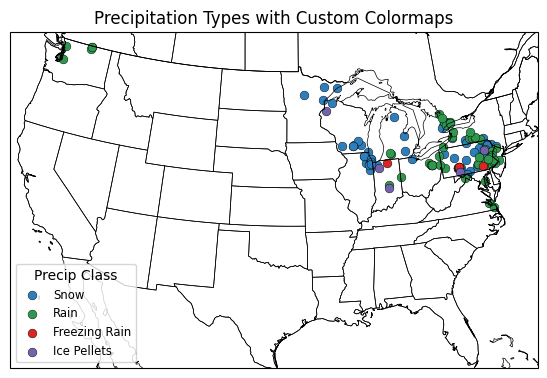

In [8]:
fig, ax = plt.subplots(
        figsize=(6, 4),
        subplot_kw={'projection': ccrs.LambertConformal()}
    )

mping_class(ax,json_data, [-120, -75, 26, 50])

In [9]:
1+1

2